In [ ]:
#différentes manipulations concernant la répartition des titres par genre

In [11]:
ep1 = "/home/port-pret-etu01/Documents/LATTICE/conllu/1810-1840.conllu"
ep2 = "/home/port-pret-etu01/Documents/LATTICE/conllu/1841-1913.conllu"
ep3 = "/home/port-pret-etu01/Documents/LATTICE/conllu/1914-2009.conllu"


          époque  extraits
1810-1840.conllu      3740
1841-1913.conllu     20630
1914-2009.conllu     29667


In [17]:
import os
import pandas as pd
from tabulate import tabulate

def count_titles_by_genre(file):
    dico = {}
    with open(file, "r", encoding="utf-8") as f:
        lines = f.readlines()
        for i in range(len(lines) - 1):
            if lines[i].startswith("# title =") and lines[i + 1].strip() == "# Genre = NF/ACAD":
                title = lines[i].strip()
                if title in dico:
                    dico[title] += 1
                else:
                    dico[title] = 1
    return dico

files = [ep1, ep2, ep3] 
dfs = []

for i, file in enumerate(files, start=1):
    title_counts = count_titles_by_genre(file)
    df = pd.DataFrame(list(title_counts.items()), columns=["Titre", "Nombre d'occurrences"])
    dfs.append(df)  
    print(f"\nÉpoque {i}\n")
    print(tabulate(df, headers="keys", tablefmt="plain"))

output_file = "titles_by_epoch.xlsx"
with pd.ExcelWriter(output_file) as writer:
    for i, df in enumerate(dfs, start=1):
        df.to_excel(writer, sheet_name=f"Époque {i}", index=False)

print(f"\nSaved {output_file}")



Époque 1

    Titre                                                                                                                                                               Nombre d'occurrences
 0  # title = Course of popular lectures as delivered by Frances Wright ... with three addresses on various public occasions, and a reply to the charges against the                       6
 1  # title = Christian Essays: To which is Added an Essay on the Influence of a Moral Life on Our Judgment in Matters of Faith                                                           20
 2  # title = Report of the "Union Committee" appointed by the meeting of the signers of the memorial to Congress, held on the 11th day of February, 1834, at the Me                       2
 3  # title = St. Pierre's Studies of nature                                                                                                                                              17
 4  # title = A view of the Constitution of 

In [18]:
import pandas as pd

def analyser_et_afficher_repartition(chemin_fichier):
    xls = pd.ExcelFile(chemin_fichier)
    epoque_dict = {}

    for feuille in xls.sheet_names:
        df = pd.read_excel(xls, sheet_name=feuille, usecols=[0, 1, 2], names=["titre", "nombre", "genre"])
        df["genre"] = df["genre"].fillna("")

        total_autres = df[df["genre"] == ""]["nombre"].sum()
        total_med = df[df["genre"] == "m"]["nombre"].sum()
        total_psy = df[df["genre"] == "p"]["nombre"].sum()

        epoque_dict[feuille] = [total_autres, total_med, total_psy]

    df_plot = pd.DataFrame(epoque_dict, index=["AUTRES", "MED", "PSY"])

   
    return df_plot

chemin_fichier = "/home/port-pret-etu01/Documents/LATTICE/méta/docs annexes/titresmp.xlsx"
df_plot = analyser_et_afficher_repartition(chemin_fichier)

print("DataFrame der Genres pro Epoche:")
print(df_plot)



DataFrame der Genres pro Epoche:
        Époque 1  Époque 2  Époque 3
AUTRES       550      2339      2083
MED           24       158       360
PSY            0        54        72


In [19]:
import pandas as pd
from collections import defaultdict

def getgenres(file):
    dico = defaultdict(int)
    with open(file, "r") as f:
        content = f.readlines()
        for line in content:
            if line.startswith("# Genre ="):
                genre = line.split()
                k = genre[-1] if genre[-1] != "=" else "NONE"
                dico[k] += 1
    return dico

files = [ep1, ep2, ep3]


genre_data = {}

for i, file in enumerate(files):
    genre_data[f'Ep {i+1}'] = getgenres(file)


df = pd.DataFrame(genre_data).fillna(0).astype(int)

print(df)


         Ep 1   Ep 2   Ep 3
MAG       577   3379   6644
FIC      2368  14048  17881
NF/ACAD   574   2551   2515
NONE      205     95    484
NEWS        0    391   1617
TV/MOV      0      0     39


In [20]:
import pandas as pd

def combine_dataframes(df1, df2):

    df1 = df1.rename(columns={'Époque 1': 'ep1', 'Époque 2': 'ep2', 'Époque 3': 'ep3'})
    

    df1_filtered = df1.loc[['AUTRES', 'MED', 'PSY'], ['ep1', 'ep2', 'ep3']]
    

    combined_df = pd.concat([df2[['genre', 'ep1', 'ep2', 'ep3']], df1_filtered], ignore_index=True)
    

    combined_df = combined_df[combined_df['genre'] != 'NF ACAD']

    combined_df['genre'] = combined_df['genre'].replace('AUTRES', 'ACADEMIC')
    

    combined_df = combined_df.dropna(subset=['ep1', 'ep2', 'ep3'])


    combined_df = combined_df.set_index('genre')

    return combined_df

dfone = pd.DataFrame({
    'Époque 1': [550, 24, 0],
    'Époque 2': [2339, 158, 54],
    'Époque 3': [2095, 352, 68]
}, index=['AUTRES', 'MED', 'PSY'])

genre_data = {
    'genre': ['MAG', 'FIC', 'NF/ACAD', 'NONE', 'NEWS', 'TV/MOV'],
    'ep1': [577, 2368, 574, 205, 0, 0],
    'ep2': [3379, 14048, 2551, 95, 391, 0],
    'ep3': [6644, 17881, 2515, 484, 1617, 39]
}
dftwo = pd.DataFrame(genre_data)

dftwo[['ep1', 'ep2', 'ep3']] = dftwo[['ep1', 'ep2', 'ep3']].fillna(0).astype(int)


combined_df = combine_dataframes(dfone, dftwo)
final = combined_df.iloc[:-3]

print(combined_df)


          ep1    ep2    ep3
genre                      
MAG       577   3379   6644
FIC      2368  14048  17881
NF/ACAD   574   2551   2515
NONE      205     95    484
NEWS        0    391   1617
TV/MOV      0      0     39
NaN       550   2339   2095
NaN        24    158    352
NaN         0     54     68


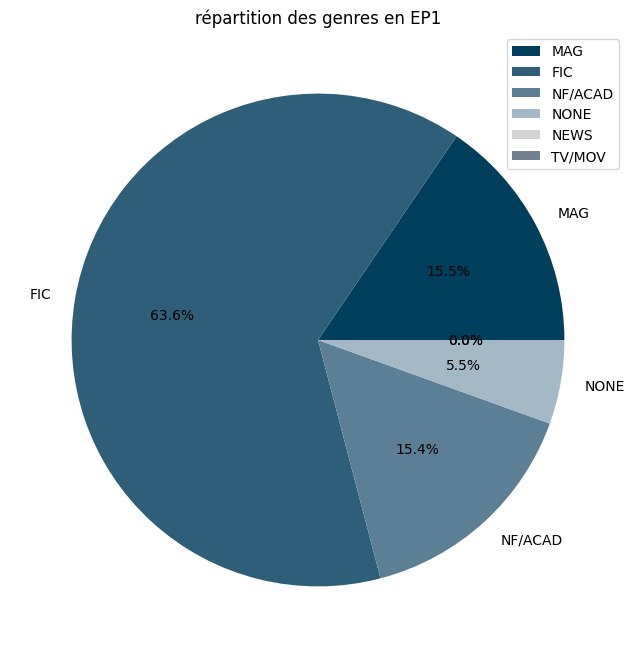

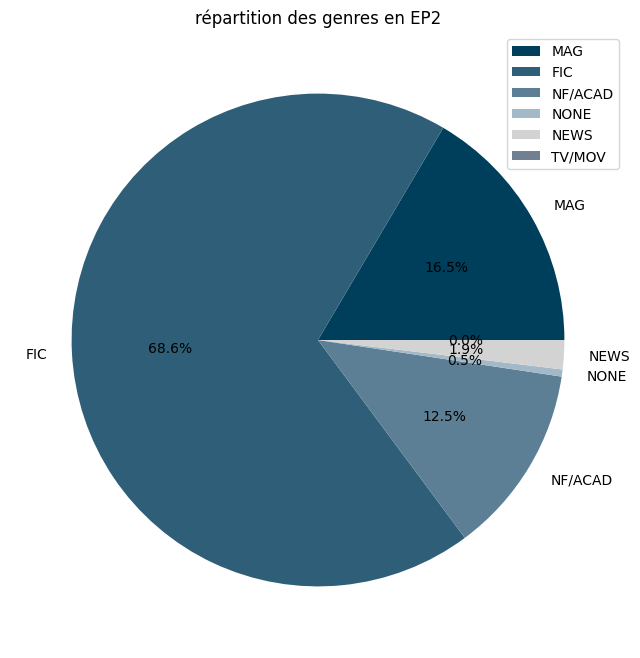

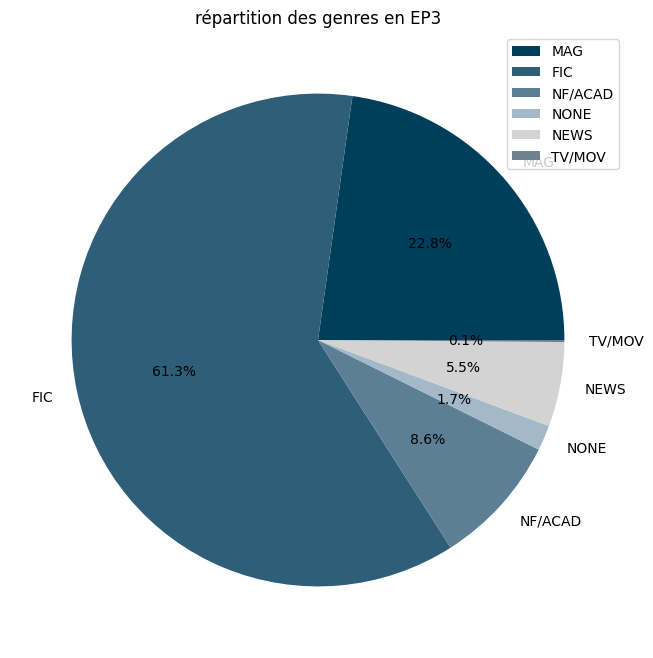

In [25]:
import matplotlib.pyplot as plt

final = combined_df.iloc[:-3]

epochs = ['ep1', 'ep2', 'ep3']
for epoch in epochs:
    plt.figure(figsize=(8, 8))
    
    farben = [
    '#003f5c', 
    '#2f5f78',  
    '#5d7f95',  
    '#a3b9c8',  
    '#d3d3d3',  
    '#708090',  
    '#4682b4',  
    '#778899'   
    ]

    final[epoch].plot(
        kind='pie',
        autopct='%1.1f%%',
        legend=True,
        labels=final.index,
        colors=farben
    )
    

    plt.title(f"répartition des genres en {epoch.upper()}")
    
    plt.ylabel('') 
    plt.show()
